# **HBO Silicon Valley: Bertram Gilfoyle's Bitcoin Price Drop Alert Bot**

Jon Chun
22 Nov 2021

* https://www.youtube.com/watch?v=t_L0UPmxgho

* https://github.com/ApoorvTyagi/Bitcoin-Drop-Alert

* https://github.com/dbader/schedule

* https://github.com/YuriyLisovskiy/pynotifier



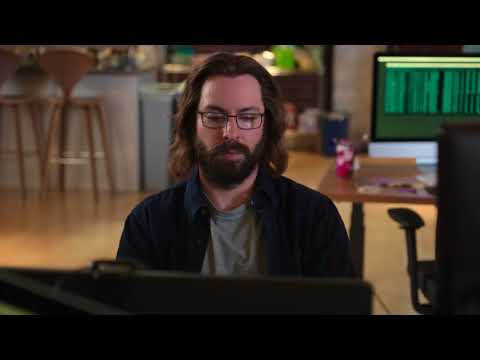

In [ ]:
from IPython.display import Audio,Image, YouTubeVideo
# id='t_L0UPmxgho'
# id='t_L0UPmxgho?t=25'
id='gz7IPTf1uts'
YouTubeVideo(id=id,width=1200,height=600)

## Clone Repo

In [ ]:
!git clone https://github.com/ApoorvTyagi/Bitcoin-Drop-Alert.git

Cloning into 'Bitcoin-Drop-Alert'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 39 (delta 14), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (39/39), done.


In [ ]:
!ls

Bitcoin-Drop-Alert  sample_data


In [ ]:
!wget https://github.com/ApoorvTyagi/Bitcoin-Drop-Alert/blob/master/Assets/gilfoyle.jpg

--2022-02-04 19:26:44--  https://github.com/ApoorvTyagi/Bitcoin-Drop-Alert/blob/master/Assets/gilfoyle.jpg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘gilfoyle.jpg’

gilfoyle.jpg            [ <=>                ] 165.52K  --.-KB/s    in 0.04s   

2022-02-04 19:26:44 (4.22 MB/s) - ‘gilfoyle.jpg’ saved [169489]



In [ ]:
!mv gilfoyle.jpg ./Bitcoin-Drop-Alert

In [ ]:
!ls Bitcoin-Drop-Alert

 Assets				    gilfoyle.jpg	 README.md
 bitcoin.ico			    Gilfoyle_Music.mp3	 Script.py
'Bitcoin Price Drop (v1.0).ipynb'   LICENSE


## Installation and Configuration

In [ ]:
# !pip install pygame

In [ ]:
!pip install schedule

In [ ]:
!sudo apt-get install libnotify-bin

# https://github.com/YuriyLisovskiy/pynotifier

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
!pip install py-notifier

In [ ]:
!pwd

/content


In [ ]:
# Does not work from Google Colab:

from pynotifier import Notification

Notification(
	title='Notification Title',
	description='Notification Description',
	icon_path='/content/Bitcoin-Drop-Alert/gilfoyle.jpg', # On Windows .ico is required, on Linux - .png
	duration=5,                                   # Duration in seconds
	urgency='normal'
).send()

In [ ]:
from IPython.display import Audio
from IPython.display import display

In [ ]:
# from win10toast import ToastNotifier
# from pygame import mixer
import schedule
import requests
import json
from datetime import datetime

In [ ]:
URL = "https://api.coindesk.com/v1/bpi/currentprice/{}.json"
MESSAGE = "Bitcoin Price Decreased"
CURRENT_PRICE = 4177448.99
CURRENCY = "INR"
# TOASTER = ToastNotifier()

## Functions

In [ ]:
def get_current_price():
    response = requests.get(URL.format(CURRENCY))
    res = json.loads(response.text)
    rate = float(res["bpi"][CURRENCY]["rate_float"])
    return round(rate,2)

In [ ]:
# Test

get_current_price()

3023666.64

In [ ]:
def show_notification(msg_title, msg_body, msg_duration=10):
  Notification(title='Notification Title',
               description='Notification Description',
               icon_path='/content/gilfoyle.jpg', # On Windows .ico is required, on Linux - .png
               duration=5,                                   # Duration in seconds
               urgency='normal').send()

"""
def show_notification(toast_title, toast_message, toast_duration=10):
    TOASTER.show_toast(
        title=toast_title,
        msg=toast_message,
        duration=toast_duration,
        icon_path="bitcoin.ico"
    )
""";

In [ ]:
# Test

msg = f'Current Price is: ₹{get_current_price()}'
show_notification(MESSAGE, msg)

In [ ]:
!ls Bitcoin-Drop-Alert

 Assets				    gilfoyle.jpg	 README.md
 bitcoin.ico			    Gilfoyle_Music.mp3	 Script.py
'Bitcoin Price Drop (v1.0).ipynb'   LICENSE


In [ ]:
sound_file = 'Bitcoin-Drop-Alert/Gilfoyle_Music.mp3'

def play_sound():
  wn = Audio(sound_file, autoplay=True) 
  display(wn)
  
"""
def play_sound():
    mixer.init()
    mixer.music.load('./Bitcoin-Drop-Alert/Gilfoyle_Music.mp3')
    mixer.music.play() 
""";

In [ ]:
# Test

play_sound()

In [ ]:
def check_current_price():
  now_dt = now_dt = datetime.now().strftime("%H:%M:%S")
  rate = get_current_price()
  global CURRENT_PRICE
  msg = f'Current Price at {now_dt}: ₹{rate}'
  show_notification(MESSAGE,msg)
  if rate < CURRENT_PRICE:
    play_sound()
    msg = f"PRICE DROP!: ₹{rate}"
    show_notification(MESSAGE,msg)
    print(f'{msg}\n  {MESSAGE}')
    CURRENT_PRICE = rate

## Main Loop

In [ ]:
CURRENT_PRICE = get_current_price()
# schedule.every(1).minute.do(check_current_price)
schedule.every(10).seconds.do(check_current_price)
while True:
  schedule.run_pending()

PRICE DROP!: ₹3022812.53
  Bitcoin Price Decreased


PRICE DROP!: ₹3022334.88
  Bitcoin Price Decreased


# **END OF NOTEBOOK**

## Notes

In [ ]:
!pip install gtts

In [ ]:
from gtts import gTTS
from IPython.display import Audio
from IPython.display import display

for voice in ["Aniket","sachin"]: 
    tts = gTTS("Hello {}".format(voice)) 
    tts.save('1.wav')
    sound_file = '1.wav'
    wn = Audio(sound_file, autoplay=True) ##
    display(wn)##